In [1]:
import numpy as np
import pygimli as pg
#import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle
import matplotlib.colors as mcolors
from pygimli.viewer import pv
import pyvista

In [2]:
dir='//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/'

In [3]:
data = ert.load(dir+"res2dinv_inputs/ERT_eastern_perpendicular_gps.dat")
data.save(dir + '3dmod/example.ohm', 'a b m n')

03/03/25 - 10:49:36 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


1

In [4]:
#plc = mt.createGrid(start=[0, -150, 0], end=[235, 150, -90], pos=[140, -140, -140], boundaryMarker=1)
dx = 5
dy = 5
dz = 5
x = np.arange(0, 240, dx)
y = np.arange(0, 305, dy)
z = np.arange(0, 155, dz)
grid = pg.createGrid(x, y, z)
print(grid)

Mesh: Nodes: 90768 Cells: 84600 Boundaries: 259830


In [5]:
shm = ert.load(dir + '3dmod/example2.ohm')



In [7]:
for c in grid.cells():
    if (c.center().y() <= 130 and c.center().z() >= 130) or (c.center().y() >= 170 and c.center().z() >= 130):
        c.setMarker(1)
    else:
        c.setMarker(2)
...
pg.show(grid, alpha=0.5)


Widget(value='<iframe src="http://localhost:63739/index.html?ui=P_0x26ca73a8450_1&reconnect=auto" class="pyvis…

(<pyvista.plotting.plotter.Plotter at 0x26ca73a8450>, None)

03/03/25 - 10:56:18 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 1): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\4611119354365489944


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x26cf42e5090>)

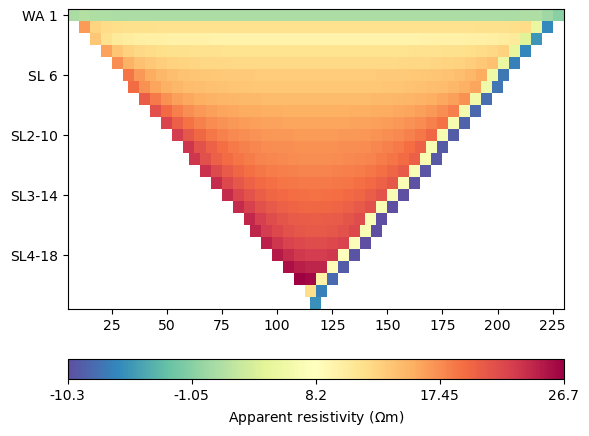

In [8]:
res_air = [[1, 1000.0], [2, 10.0]]

air_wide = ert.simulate(grid, res=res_air, scheme=shm, sr=False,
                   calcOnly=True, verbose=True)


air_wide['k'] = ert.createGeometricFactors(air_wide)
air_wide['rhoa'] = (air_wide['u']/air_wide['i'])*air_wide['k'] 
air_wide['err'] = ert.estimateError(air_wide, relativeError=0.003, absoluteUError=5e-5)
air_wide.save(dir + '3dmod/air_wide.ohm', 'a b m n k rhoa u i')

ert.showData(air_wide)

In [6]:
for c in grid.cells():
    if (c.center().y() <= 100 and c.center().z() >= 140) or (c.center().y() >= 200 and c.center().z() >= 140):
        c.setMarker(1)
    else:
        c.setMarker(2)
...
pg.show(grid, alpha=0.5)

Widget(value='<iframe src="http://localhost:63739/index.html?ui=P_0x26cf3bf31d0_0&reconnect=auto" class="pyvis…

(<pyvista.plotting.plotter.Plotter at 0x26cf3bf31d0>, None)

In [9]:
for c in grid.cells():
    if (c.center().y() <= 50 and c.center().z() >= 140) or (c.center().y() >= 250 and c.center().z() >= 140):
        c.setMarker(1)
    else:
        c.setMarker(2)
...
pg.show(grid, alpha=0.5)

Widget(value='<iframe src="http://localhost:63739/index.html?ui=P_0x26d490ce2d0_2&reconnect=auto" class="pyvis…

(<pyvista.plotting.plotter.Plotter at 0x26d490ce2d0>, None)

In [25]:
shm = ert.load(dir + '3dmod/example.ohm')
plc = mt.createCube(start=[0, -150, -90], end=[235, 150, 0], pos=[100, 0, -25], boundaryMarker=1)

for s in shm.sensors():
    plc.createNode(s, marker=-99)

for s in plc.positions(pg.find(plc.nodeMarkers() == -99)):
    plc.createNode(s - [1, 0.0, 0.0])
    
air1 = mt.createCube(start=[0, -150, -5], end=[235, -20, 0], pos=[230, -110, -2], marker=2)
air2 = mt.createCube(start=[0, 20, -5], end=[235, 150, 0], pos=[230, 110, -2], marker=2)

air3 = mt.createCube(start=[0, -150, -5], end=[235, -40, 0], pos=[230, -110, -2], marker=2)
air4 = mt.createCube(start=[0, 40, -5], end=[235, 150, 0], pos=[230, 110, -2], marker=2)

air5 = mt.createCube(start=[0, -150, 0], end=[235, -60, -5], pos=[230, -110, -2], marker=2)
air6 = mt.createCube(start=[0, 60, 0], end=[235, 150, -5], pos=[230, 110, -2], marker=2)

#air1.addRegionMarker([230, -110, -5], marker=2)  
#air2.addRegionMarker([230, 110, -5], marker=2) 

plc_wide = plc + air1 + air2
plc_mid = plc + air3 + air4
plc_thin = plc + air5 + air6

mesh_air_thin = mt.createMesh(plc_thin)
mesh_air_mid = mt.createMesh(plc_mid)
mesh_air_wide = mt.createMesh(plc_wide)
mesh_hom = mt.createMesh(plc)

mesh_air_thin.exportVTK(dir + '3dmod/mesh_air_thin')
mesh_air_mid.exportVTK(dir + '3dmod/mesh_air_mid')
mesh_air_wide.exportVTK(dir + '3dmod/mesh_air_wide')
mesh_hom.exportVTK(dir + '3dmod/mesh_hom')

ax, _ = pg.show(mesh_air_mid, alpha=0.5, showMesh=True)

Widget(value='<iframe src="http://localhost:63739/index.html?ui=P_0x26da9e54190_4&reconnect=auto" class="pyvis…

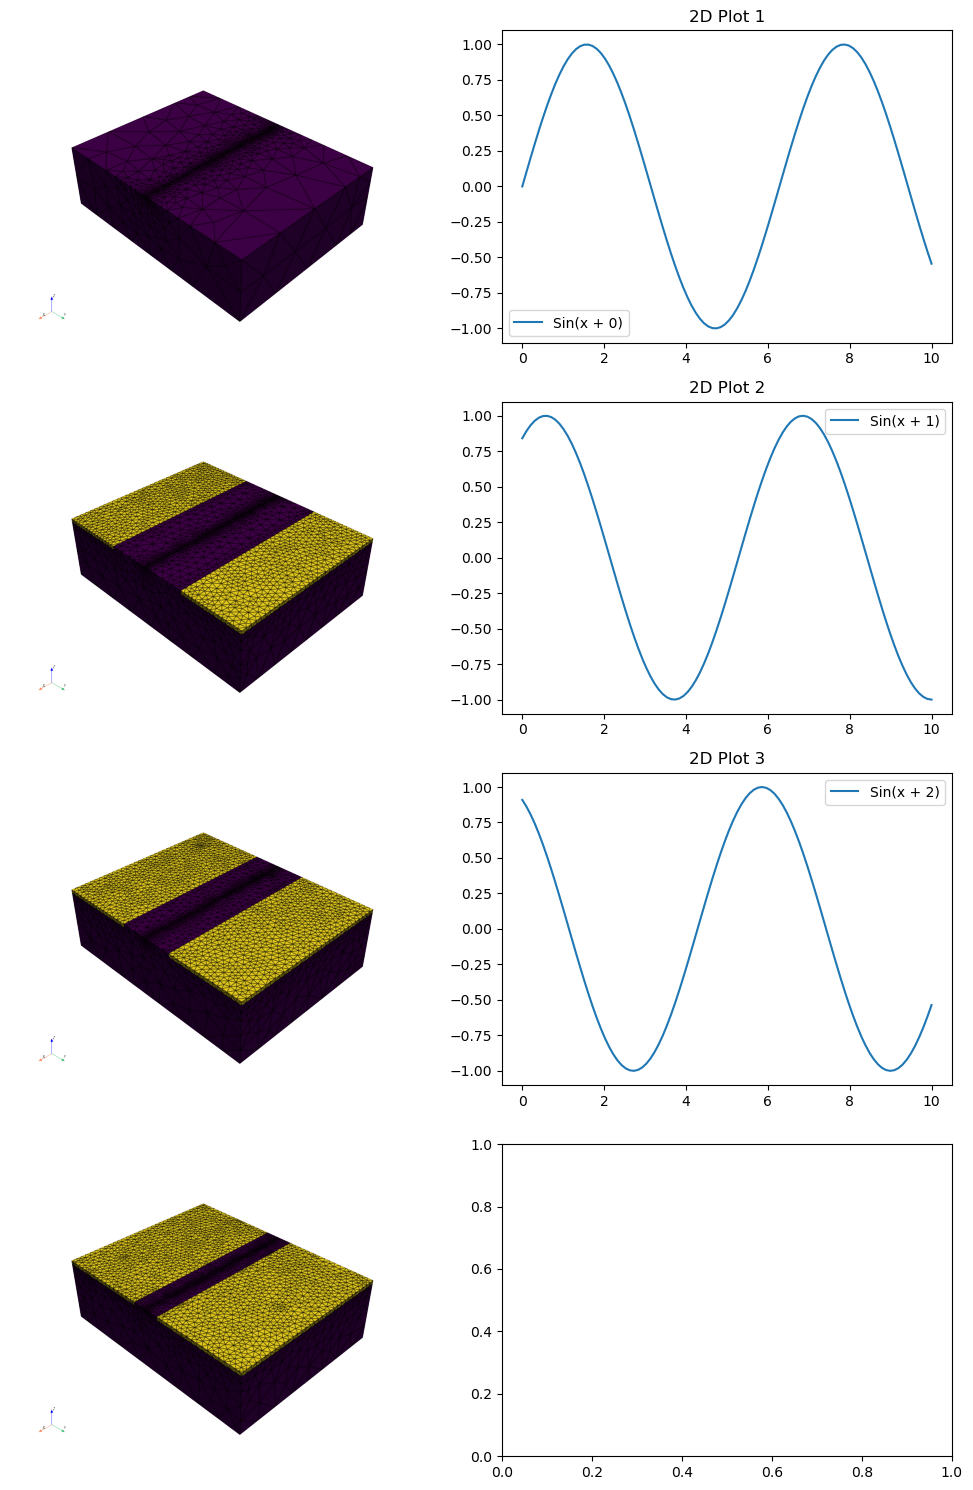

In [26]:
def render_vtk_to_image(filepath):

    mesh = pyvista.read(filepath)
    plotter = pyvista.Plotter(off_screen=True)
    plotter.add_mesh(mesh, show_scalar_bar=False, show_edges=True)
 
    plotter.set_background("white")
    plotter.show_axes()  
    img = plotter.screenshot(transparent_background=True)
    plotter.close()
    return img


vtk_files = [dir + '3dmod/mesh_hom.vtk', dir + '3dmod/mesh_air_thin.vtk', dir + '3dmod/mesh_air_mid.vtk', dir + '3dmod/mesh_air_wide.vtk']  # Replace with your actual VTK file paths

# Create a Matplotlib figure with 3x2 grid
fig, axs = plt.subplots(4, 2, figsize=(10, 15))

# Display VTK files in the left column
for i, filepath in enumerate(vtk_files):
    # Get the rendered image from PyVista
    img = render_vtk_to_image(filepath)
    # Display the image on the Matplotlib subplot
    axs[i, 0].imshow(img)
    axs[i, 0].axis('off')  # Hide axes for VTK images

# Generate 2D plots in the right column
x = np.linspace(0, 10, 100)
for i in range(3):
    axs[i, 1].plot(x, np.sin(x + i), label=f'Sin(x + {i})')
    axs[i, 1].set_title(f'2D Plot {i + 1}')
    axs[i, 1].legend()

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x26daa9ab410>)

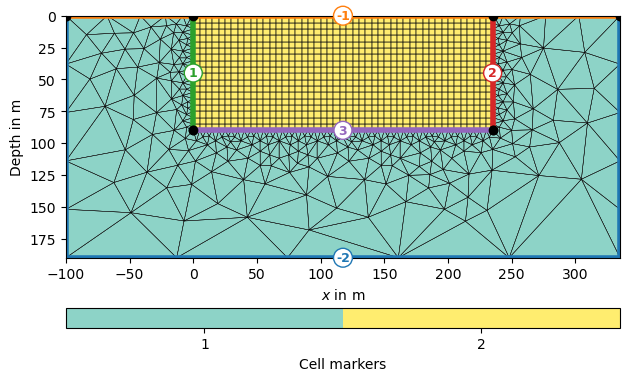

In [27]:
x = np.arange(0, 236, 5)


y = -pg.cat([0], pg.utils.grange(0.5, 90, n=19))[::-1] 


inversionDomain = pg.createGrid(x=x, y=y, marker=2)

grid = pg.meshtools.appendTriangleBoundary(inversionDomain, marker=1,
                                           xbound=100, ybound=100)
pg.show(grid, markers=True, showMesh=True)

03/03/25 - 14:10:31 - pyGIMLi - INFO - Calculate geometric factors.
03/03/25 - 14:10:32 - pyGIMLi - INFO - Data error estimate (min:max)  0.05000226148430927 : 0.05010411458341139


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x26daaa717d0>)

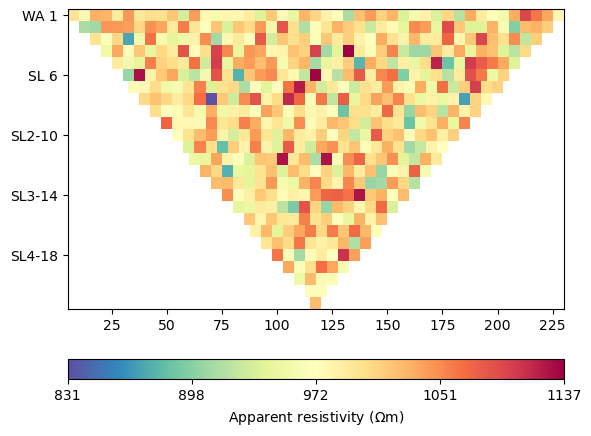

In [28]:
res = 1000.0
hom = ert.simulate(mesh_hom, res=1000.0, scheme=shm, noiseLevel= 0.05,
                    verbose=True, sr=False)
ert.showData(hom)

03/03/25 - 14:10:37 - pyGIMLi - INFO - Found 2 regions.
03/03/25 - 14:10:37 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
03/03/25 - 14:10:37 - pyGIMLi - INFO - Creating forward mesh from region infos.
03/03/25 - 14:10:37 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
03/03/25 - 14:10:37 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 4791 Cells: 5860 Boundaries: 5362
03/03/25 - 14:10:37 - pyGIMLi - INFO - Use median(data values)=998.7245654989398
03/03/25 - 14:10:37 - pyGIMLi - INFO - Created startmodel from forward operator:893, min/max=998.724565/998.724565
03/03/25 - 14:10:37 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000026DAB1C06D0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 831/1137
min/max (error): 5%/5.01%
min/max (start model): 999/999
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   24.99
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    2.26 (dPhi = 87.81%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    2.26 (dPhi = 2.92%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    2.27 (dPhi = 0.01%) lam: 50.0
################################################################################
#                Abort criterion reached: dPhi = 0.01 (< 2.0%)                 #
##############################

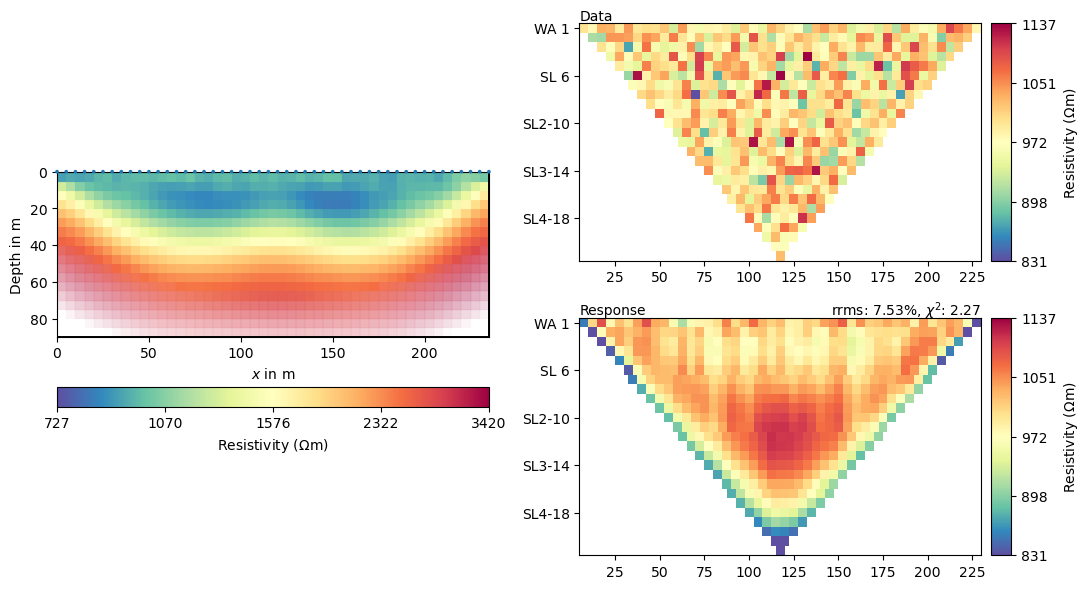

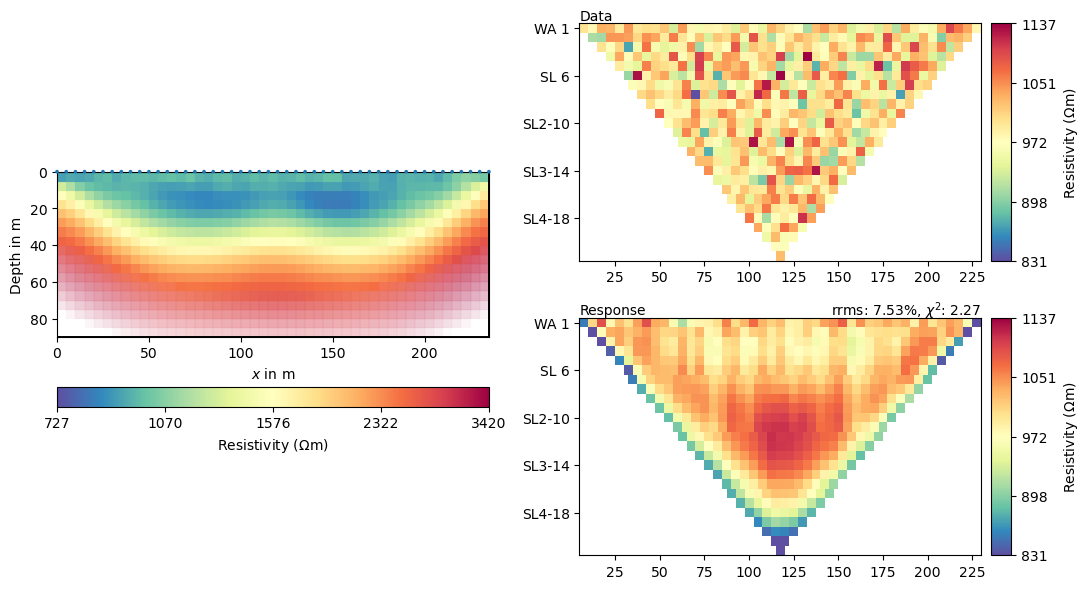

In [29]:
mesh = mt.createParaMesh2DGrid(hom)
mgr = ert.ERTManager(hom)
model = mgr.invert(hom, mesh=grid, lam=50, verbose=True)
mgr.showResultAndFit()

03/03/25 - 14:11:16 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_3d_hom\ERTManager


Path //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_3d_hom\ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_3d_hom\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

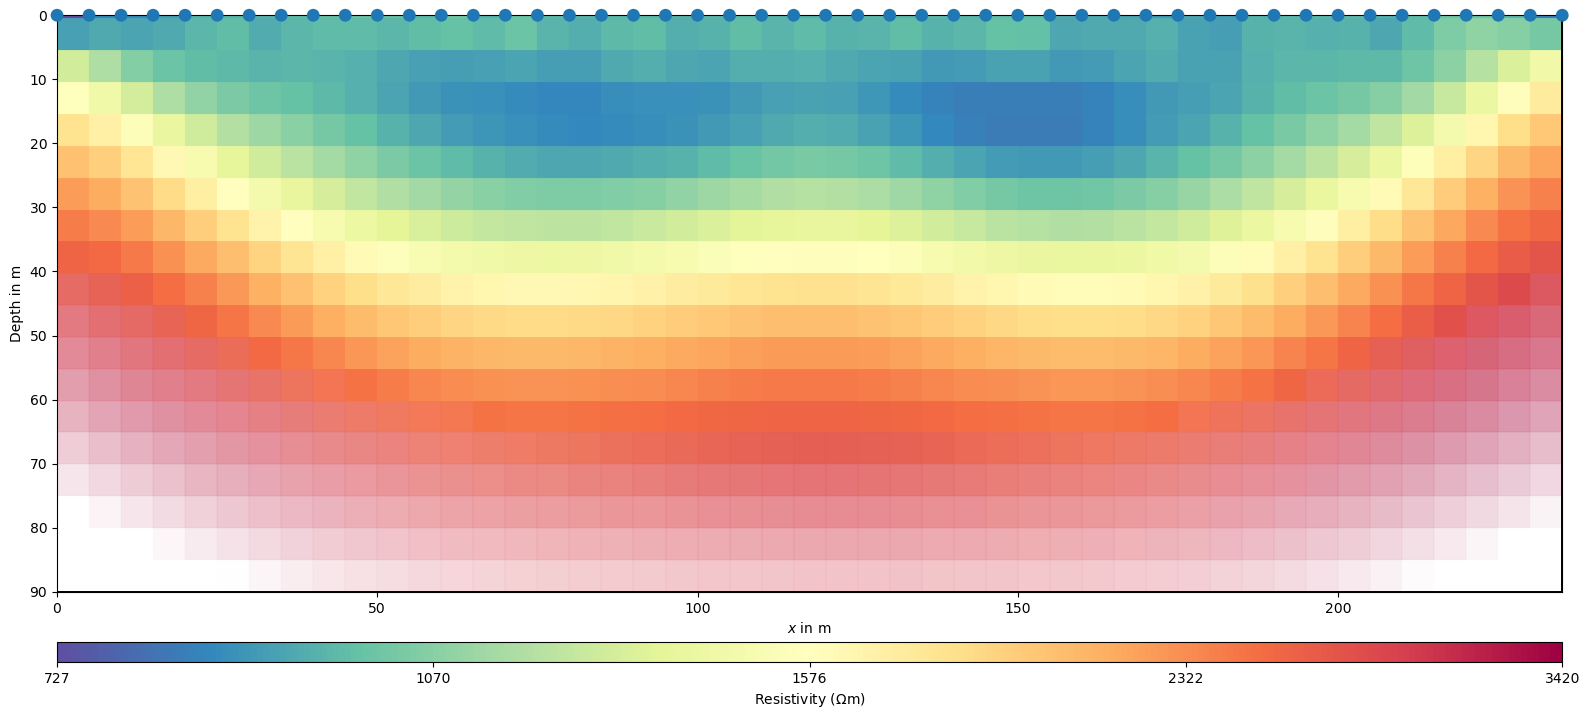

In [30]:
mgr.saveResult(dir+ 'pygimli/all_inversions/INV_3d_hom')

03/03/25 - 14:11:27 - pyGIMLi - INFO - Data error estimate (min:max)  0.05000213819234006 : 0.05138527084043184


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x26dadcbcd10>)

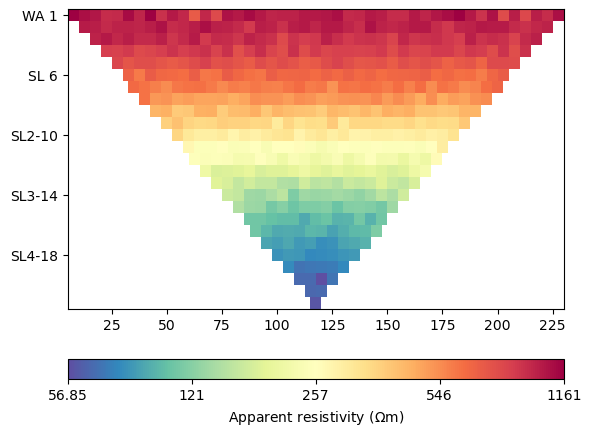

In [31]:
res_air = [[1, 1000.0], [2, 1.0]]

air_wide = ert.simulate(mesh_air_wide, res=res_air, scheme=shm, noiseLevel=0.05,
                    verbose=True, sr=False)

ert.showData(air_wide)

03/03/25 - 14:11:33 - pyGIMLi - INFO - Found 2 regions.
03/03/25 - 14:11:33 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
03/03/25 - 14:11:33 - pyGIMLi - INFO - Creating forward mesh from region infos.
03/03/25 - 14:11:33 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
03/03/25 - 14:11:34 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 4791 Cells: 5860 Boundaries: 5362
03/03/25 - 14:11:34 - pyGIMLi - INFO - Use median(data values)=532.18195633286
03/03/25 - 14:11:34 - pyGIMLi - INFO - Created startmodel from forward operator:893, min/max=532.181956/532.181956
03/03/25 - 14:11:34 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000026DADC81F30>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 56.85/1161
min/max (error): 5%/5.14%
min/max (start model): 532/532
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  161.55
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    8.88 (dPhi = 91.72%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    5.06 (dPhi = 36.96%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    3.29 (dPhi = 18.48%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    3.20 (dPhi = 0.87%) lam: 50.0
####################################################

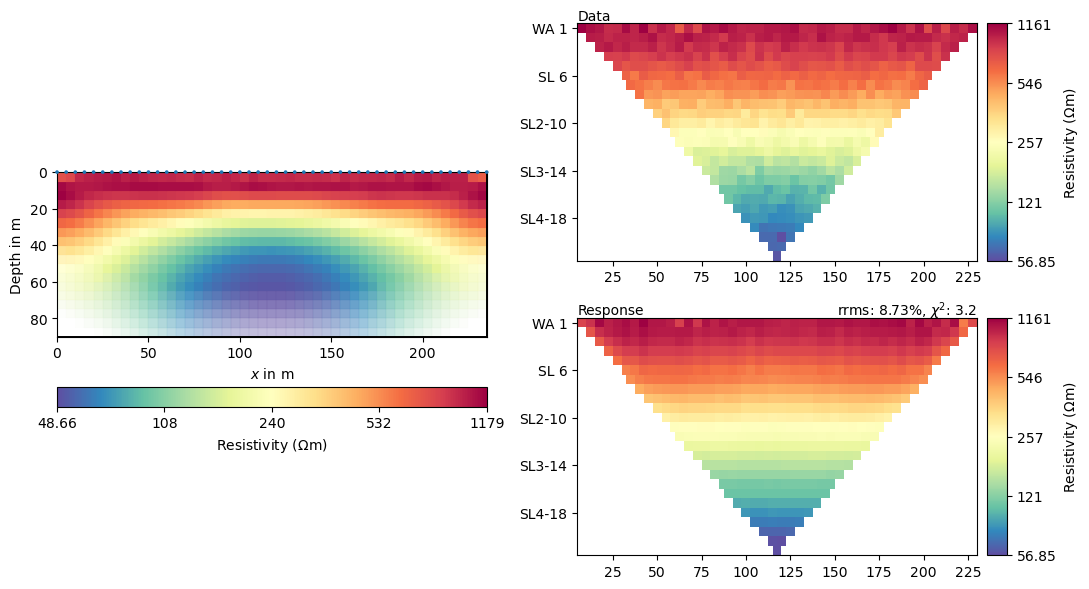

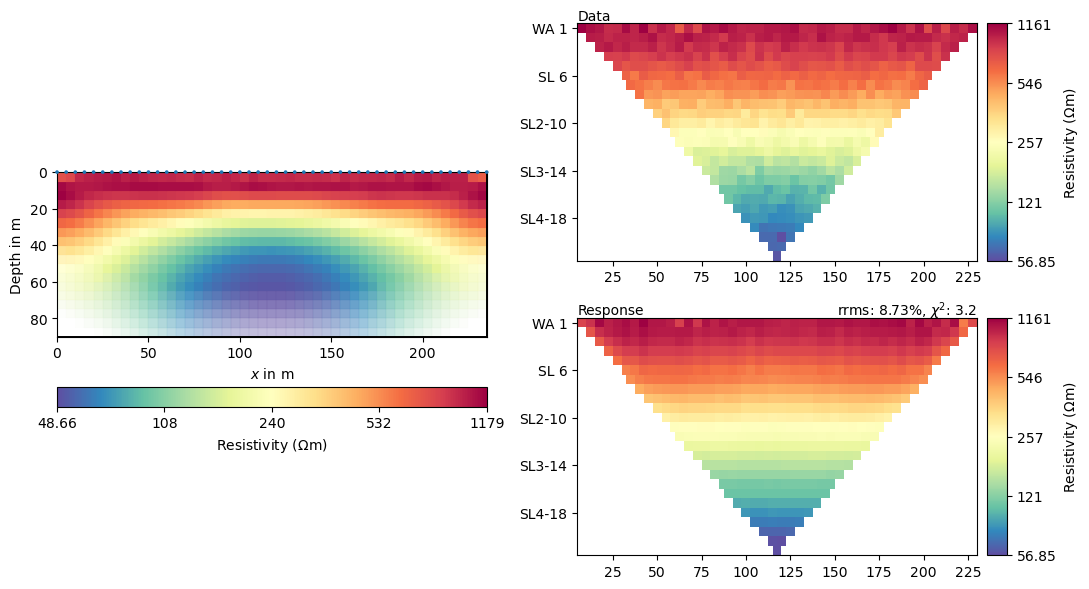

In [32]:
mesh = mt.createParaMesh2DGrid(air_wide)
mgr = ert.ERTManager(air_wide)
model_wide = mgr.invert(air_wide, mesh=grid, lam=50, verbose=True)
mgr.showResultAndFit()

03/03/25 - 14:12:15 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_3d_air_wide\ERTManager


Path //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_3d_air_wide\ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_3d_air_wide\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

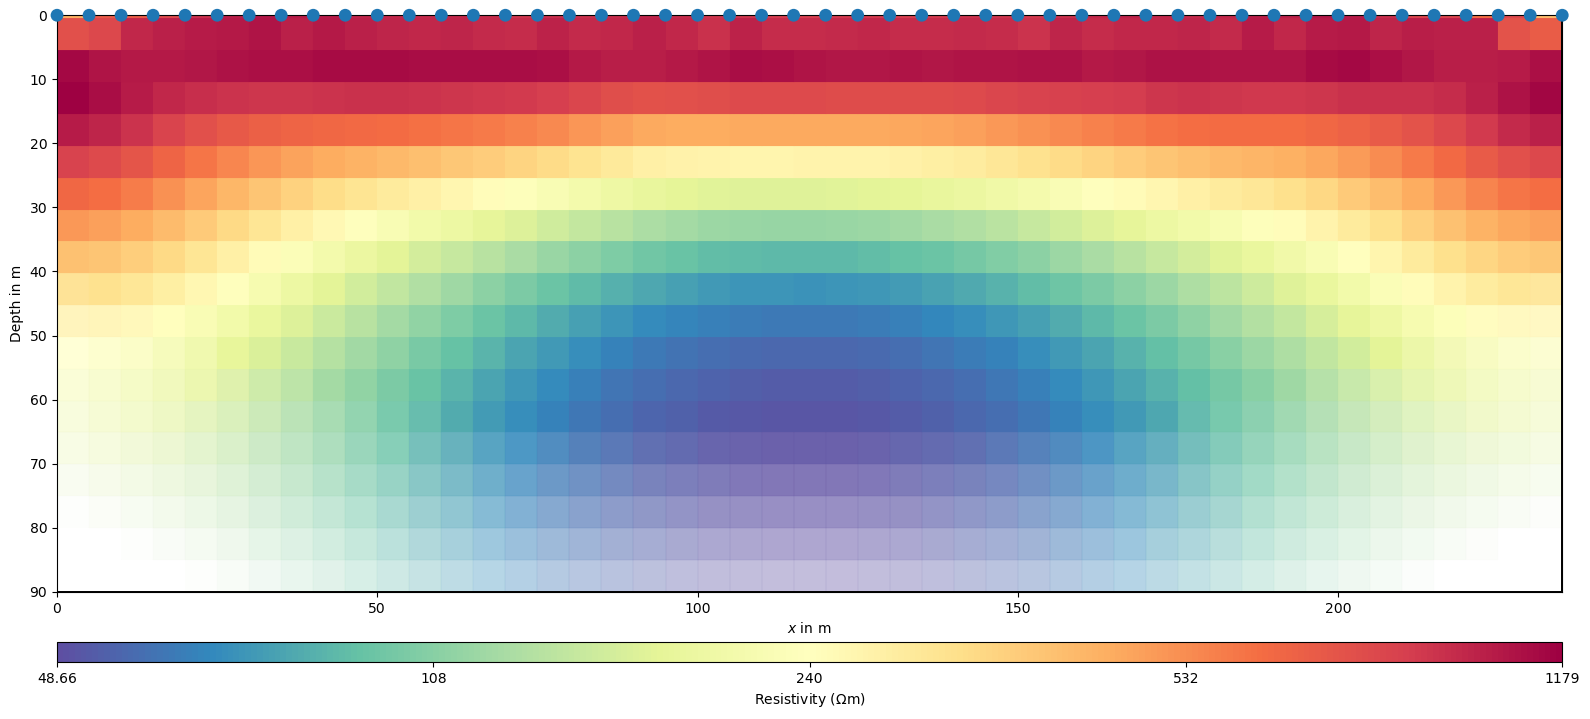

In [33]:
mgr.saveResult(dir+ 'pygimli/all_inversions/INV_3d_air_wide')

03/03/25 - 14:12:33 - pyGIMLi - INFO - Data error estimate (min:max)  0.050002294810566665 : 0.05026937319412194
03/03/25 - 14:12:33 - pyGIMLi - INFO - 1.190401522272361 19720.85247238801


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x26d4a873350>)

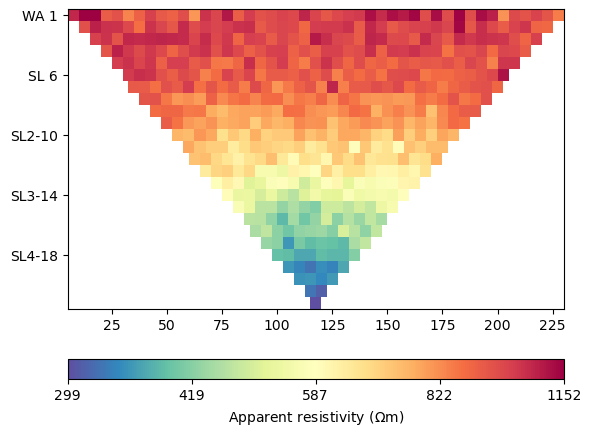

In [34]:
res_air = [[1, 1000.0], [2, 1.0]]

air_mid = ert.simulate(mesh_air_mid, res=res_air, scheme=shm, noiseLevel=0.05,
                    verbose=True, sr=False)

pg.info(np.linalg.norm(air_mid['err']), np.linalg.norm(air_mid['rhoa']))
ert.showData(air_mid)

03/03/25 - 14:12:43 - pyGIMLi - INFO - Found 2 regions.
03/03/25 - 14:12:43 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
03/03/25 - 14:12:43 - pyGIMLi - INFO - Creating forward mesh from region infos.
03/03/25 - 14:12:43 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
03/03/25 - 14:12:43 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 4791 Cells: 5860 Boundaries: 5362
03/03/25 - 14:12:43 - pyGIMLi - INFO - Use median(data values)=867.8584104773429
03/03/25 - 14:12:43 - pyGIMLi - INFO - Created startmodel from forward operator:893, min/max=867.858410/867.858410
03/03/25 - 14:12:43 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000026DA8BADCB0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 299/1152
min/max (error): 5%/5.03%
min/max (start model): 868/868
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =    9.47
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    2.64 (dPhi = 66.69%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    2.58 (dPhi = 3.53%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    2.57 (dPhi = 0.67%) lam: 50.0
################################################################################
#                Abort criterion reached: dPhi = 0.67 (< 2.0%)                 #
##############################

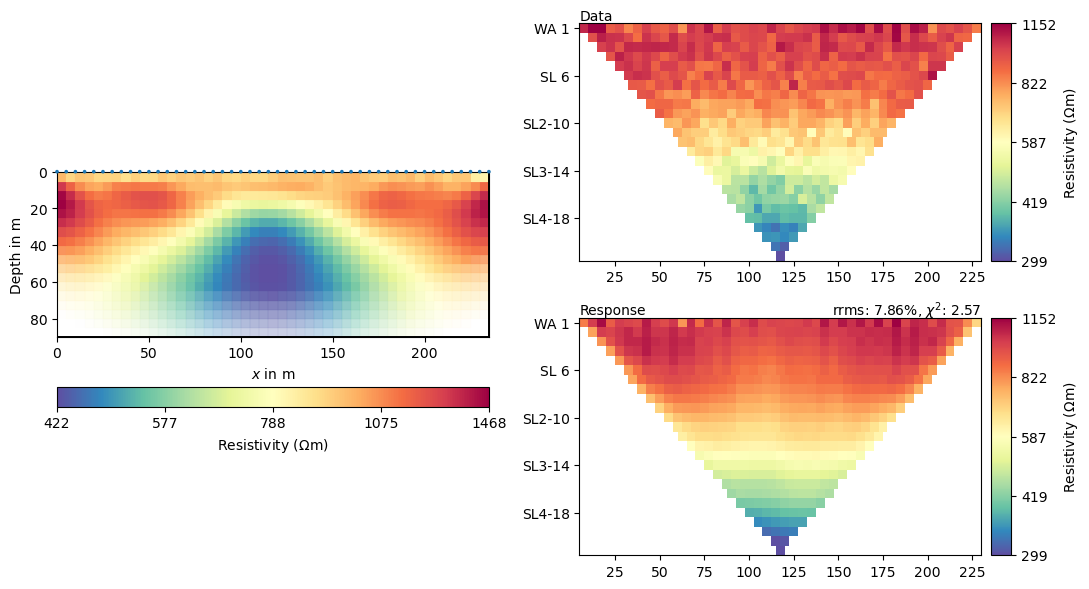

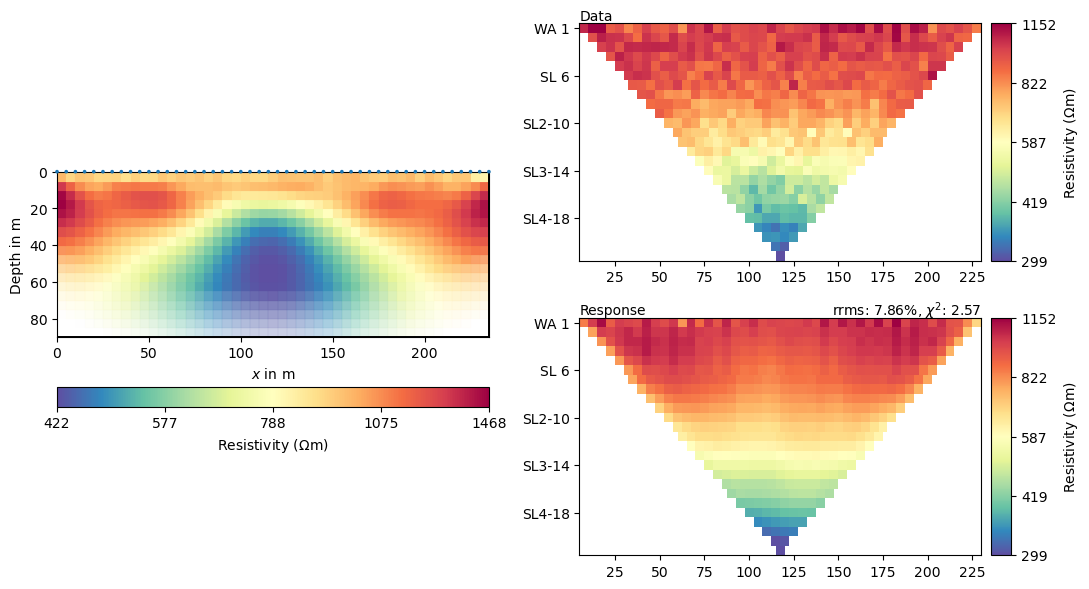

In [35]:
mesh = mt.createParaMesh2DGrid(air_mid)
mgr = ert.ERTManager(air_mid)
model_mid = mgr.invert(air_mid, mesh=grid, lam=50, verbose=True)
mgr.showResultAndFit()

03/03/25 - 14:13:15 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_3d_air_mid\ERTManager


Path //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_3d_air_mid\ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_3d_air_mid\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

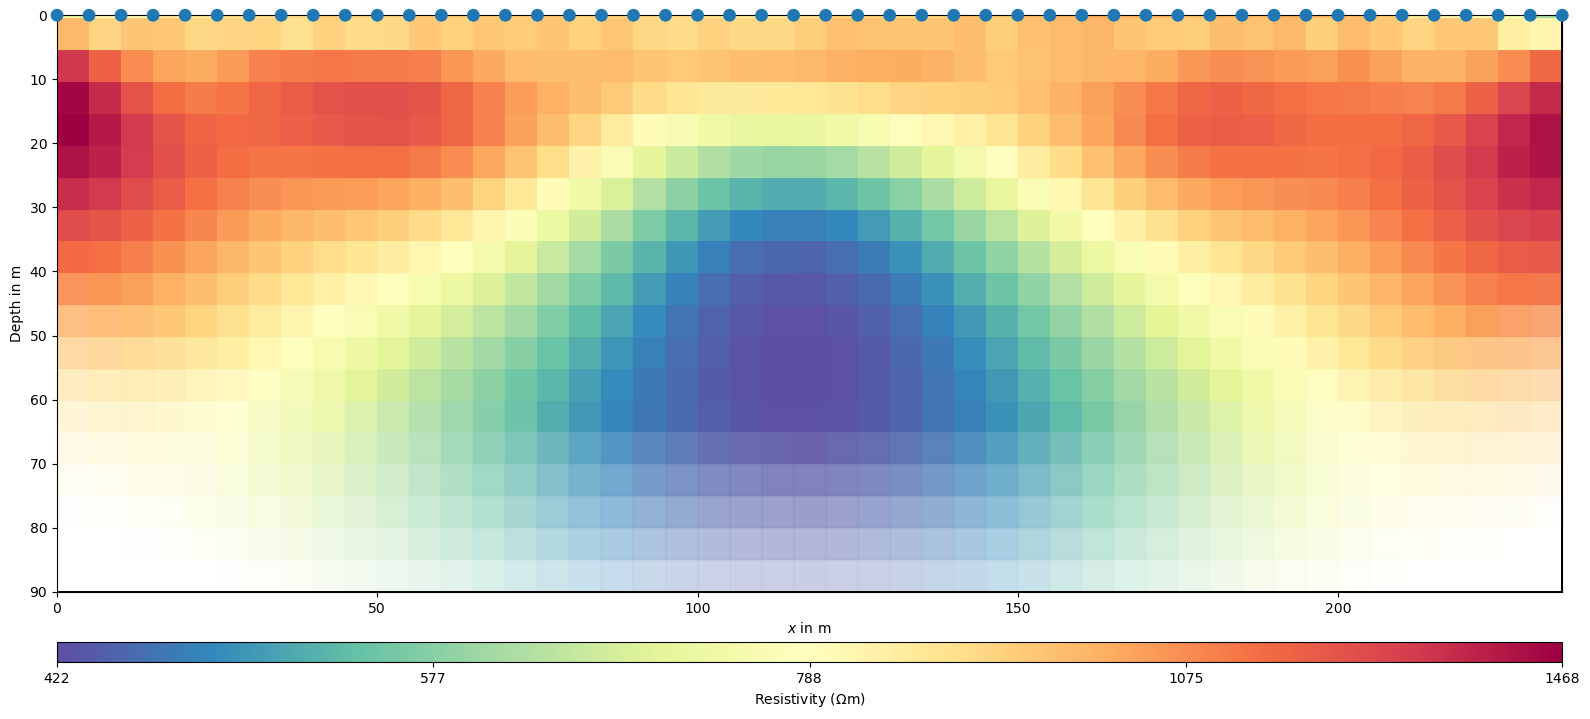

In [36]:
mgr.saveResult(dir+ 'pygimli/all_inversions/INV_3d_air_mid')

03/03/25 - 14:13:28 - pyGIMLi - INFO - Data error estimate (min:max)  0.05000225844732022 : 0.05015478417387241


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x26daff68910>)

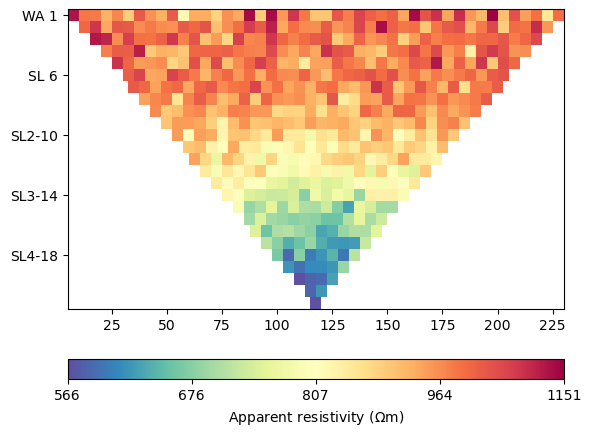

In [37]:
res_air = [[1, 1000.0], [2, 1.0]]

air_thin = ert.simulate(mesh_air_thin, res=res_air, scheme=shm, noiseLevel=0.05,
                    verbose=True, sr=False)

ert.showData(air_thin)

03/03/25 - 14:14:00 - pyGIMLi - INFO - Found 2 regions.
03/03/25 - 14:14:00 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
03/03/25 - 14:14:00 - pyGIMLi - INFO - Creating forward mesh from region infos.
03/03/25 - 14:14:00 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
03/03/25 - 14:14:00 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 4791 Cells: 5860 Boundaries: 5362
03/03/25 - 14:14:00 - pyGIMLi - INFO - Use median(data values)=934.7295152248875
03/03/25 - 14:14:00 - pyGIMLi - INFO - Created startmodel from forward operator:893, min/max=934.729515/934.729515
03/03/25 - 14:14:00 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000026D48F8C630>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 566/1151
min/max (error): 5%/5.02%
min/max (start model): 935/935
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =    9.23
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    2.37 (dPhi = 71.94%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    2.19 (dPhi = 5.75%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    2.10 (dPhi = 1.76%) lam: 50.0
################################################################################
#                Abort criterion reached: dPhi = 1.76 (< 2.0%)                 #
##############################

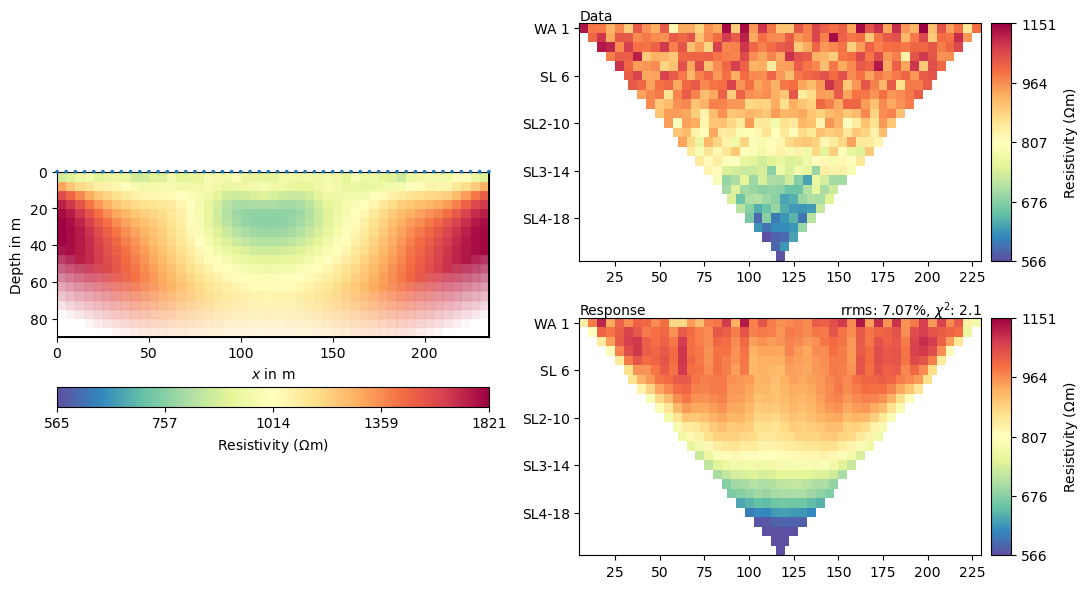

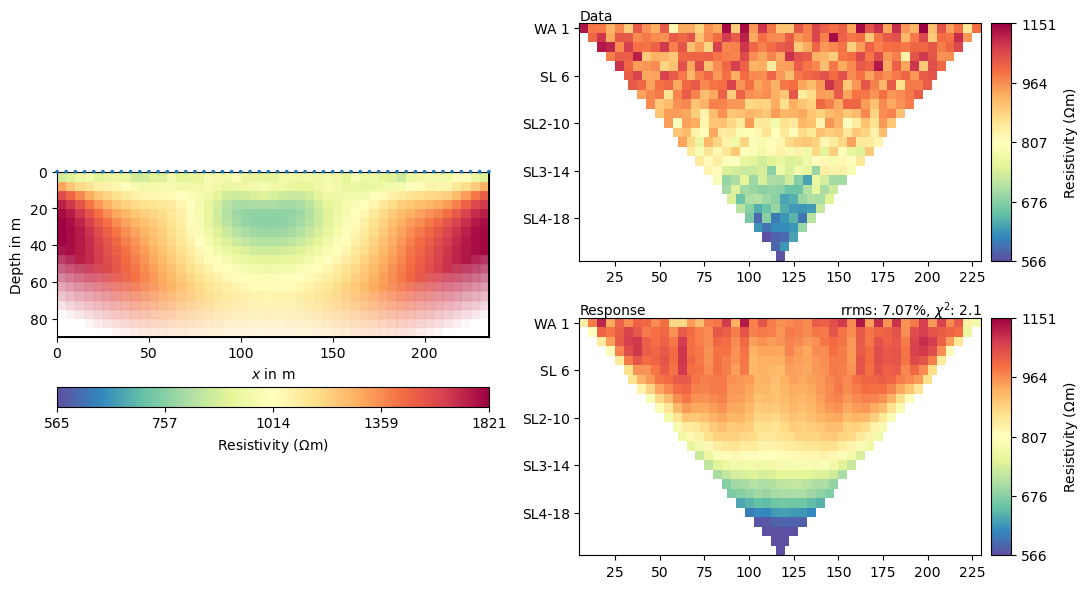

In [38]:
mesh = mt.createParaMesh2DGrid(air_thin)
mgr = ert.ERTManager(air_thin)
model_thin = mgr.invert(air_thin, mesh=grid, lam=50, verbose=True)
mgr.showResultAndFit()

03/03/25 - 14:14:35 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_3d_air_thin\ERTManager


Path //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_3d_air_thin\ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_3d_air_thin\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

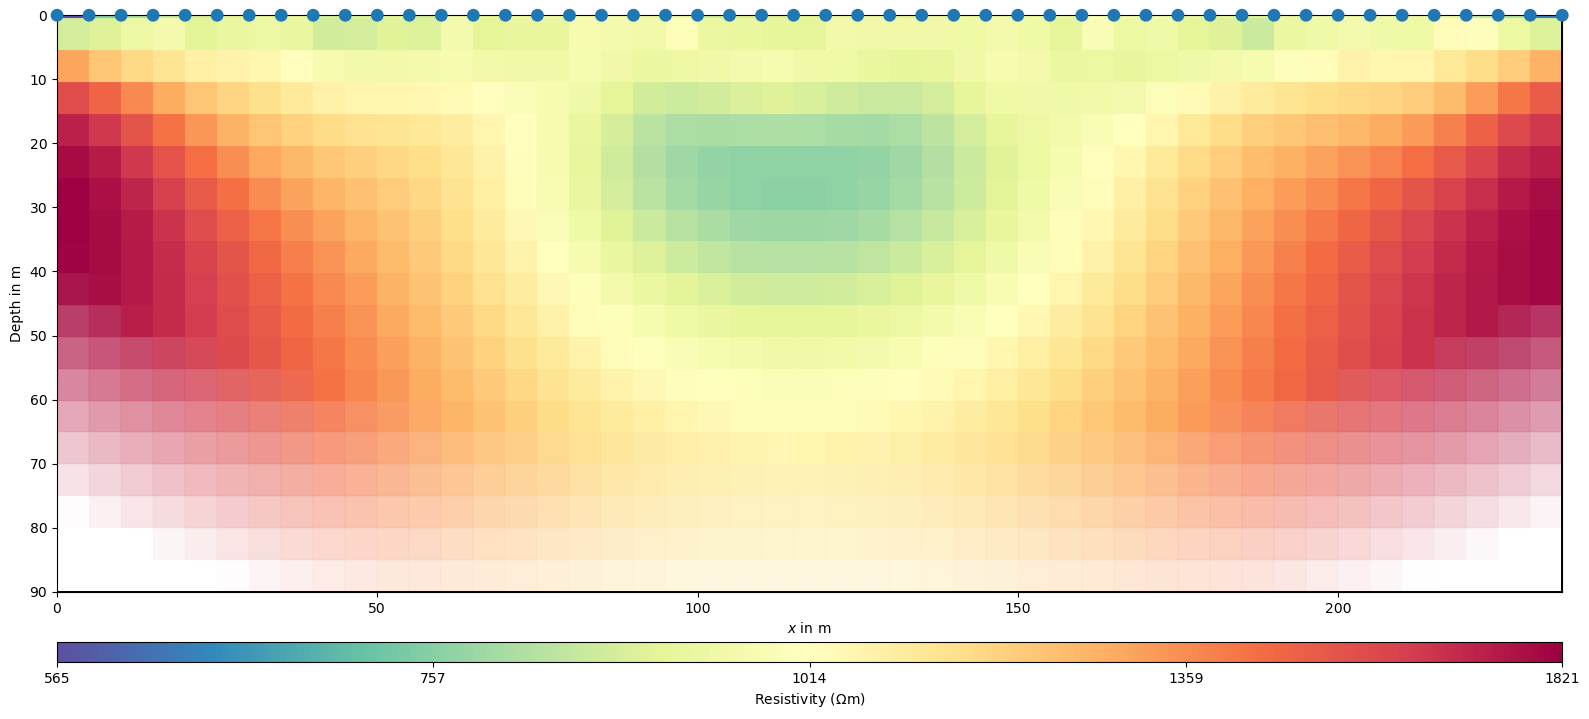

In [39]:

mgr.saveResult(dir+ 'pygimli/all_inversions/INV_3d_air_thin')